<a href="https://colab.research.google.com/github/johnpharmd/DS-Unit-2-Sprint-1-Linear-Algebra/blob/master/Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [1]:
week_0_sales = (3505, 2400, 3027, 2798, 3700, 3250, 2689)
sum_week_0_sales = sum(week_0_sales)
mean_week_0_sales = sum_week_0_sales // len(week_0_sales)
print('mean_week_0_sales:', mean_week_0_sales)

# compute variance of the sales data
# steps:
# 1) compute mean of the sales data - done;
# 2) for each number in sales data, square (number - mean);
# 3) get mean of these squared differences

sales_variance = sum((number-mean_week_0_sales)**2 for number in week_0_sales) // len(week_0_sales)
print('sales_variance is:', sales_variance)

# compute standard deviation of the sales data
# formula is square root of variance

sales_stdev = sales_variance**0.5
print('sales_stdev is:', sales_stdev)


mean_week_0_sales: 3052
sales_variance is: 183761
sales_stdev is: 428.67353545559587


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use library functions for calculating the covariance since we didn't specifically talk about its formula)

In [2]:
import numpy as np

week_0_customers = (127, 80, 105, 92, 120, 115, 93)
sales_customers_covar = np.cov(week_0_sales, week_0_customers)
sales_customers_covar


array([[214387.9047619 ,   7604.35714286],
       [  7604.35714286,    290.95238095]])

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [3]:
sum_week_0_customers = sum(week_0_customers)
mean_week_0_customers = sum_week_0_customers // len(week_0_customers)
print('mean_week_0_customers:', mean_week_0_customers)

# compute variance of the customers data
# steps:
# 1) compute mean of the customers data - done;
# 2) for each number in customers data, square (number - mean);
# 3) get mean of these squared differences

customers_variance = sum((number-mean_week_0_customers)**2 for number in week_0_customers) // len(week_0_customers)
print('customers_variance is:', customers_variance)

# compute standard deviation of the customers data
# formula is square root of variance

customers_stdev = customers_variance**0.5
print('customers_stdev is:', customers_stdev)

# check manual computations with statistics.mean
from statistics import mean
customers_mean = mean(week_0_customers)
print('\n', customers_mean)
customers_var = np.var(week_0_customers)
print('Customers stdev is:', customers_var**0.5)

mean_week_0_customers: 104
customers_variance is: 249
customers_stdev is: 15.7797338380595

 104.57142857142857
Customers stdev is: 15.792015549069118


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [4]:
import pandas as pd

titanic_df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')
print(titanic_df.shape, '\n')
titanic_df.head()

(1310, 16) 



,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [5]:
numeric_cols_df = titanic_df.select_dtypes(include=['int64', 'float64']).copy()
numeric_cols_df.head()
numeric_cols_df['body'].describe()
numeric_cols_df.isna().sum()  # based on fraction of NaN's here--1189/1310, or 0.90763358779--will drop this column
numeric_cols_df = numeric_cols_df.drop('body', axis=1)

print(numeric_cols_df.shape, '\n')
numeric_cols_df = numeric_cols_df.dropna()
numeric_cols_df.isna().sum()

print('variance-covariance matrix follows:')
print(numeric_cols_df.cov())

print('\ncorrelation matrix follows:')
numeric_cols_df.corr()

(1310, 8) 

variance-covariance matrix follows:
                     Unnamed: 0      pclass   survived          age  \
Unnamed: 0        142758.852129  284.266312 -53.841414 -1458.534777   
pclass               284.266312    0.702126  -0.127139    -3.974162   
survived             -53.841414   -0.127139   0.236319    -0.305629   
age                -1458.534777   -3.974162  -0.305629   165.385957   
sibsp                 26.066613    0.053400  -0.014245    -2.550069   
parch                  1.342019    0.013505   0.034690    -1.451467   
fare               -9410.735123  -24.227788   6.146023   114.416613   
has_cabin_number     -95.373542   -0.250062   0.061387     1.470661   

                      sibsp     parch         fare  has_cabin_number  
Unnamed: 0        26.066613  1.342019 -9410.735123        -95.373542  
pclass             0.053400  0.013505   -24.227788         -0.250062  
survived          -0.014245  0.034690     6.146023          0.061387  
age               -2.550069 

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,has_cabin_number
Unnamed: 0,1.000000,0.897876,-0.293134,-0.300169,0.066211,0.004102,-0.481215,-0.603743
pclass,0.897876,1.000000,-0.312122,-0.368798,0.061162,0.018615,-0.558629,-0.713783
survived,-0.293134,-0.312122,1.000000,-0.048887,-0.028122,0.082418,0.244265,0.302031
age,-0.300169,-0.368798,-0.048887,1.000000,-0.190305,-0.130355,0.171892,0.273520
sibsp,0.066211,0.061162,-0.028122,-0.190305,1.000000,0.373485,0.160238,-0.009264
parch,0.004102,0.018615,0.082418,-0.130355,0.373485,1.000000,0.221539,0.036629
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,0.507253
has_cabin_number,-0.603743,-0.713783,0.302031,0.273520,-0.009264,0.036629,0.507253,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

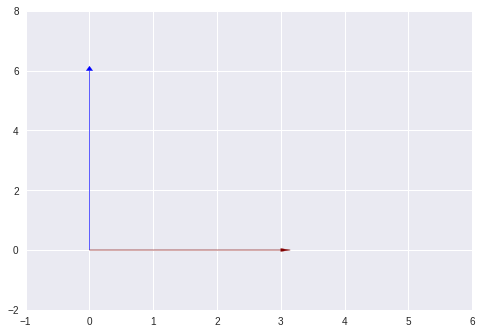

In [6]:
from math import sqrt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# a_array = np.array([1, 0, -1])
# b_array = np.array([1, sqrt(2), 1])

# norm_a = np.linalg.norm(a_array)
# norm_b = np.linalg.norm(b_array)

# norm_a - norm_b

# np.dot(a_array, b_array)
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# # make the grid
# x, y = np.meshgrid(np.array([0, 0, 0]), np.array([0, 0, 0]))

# # plot the 2 vectors
# ax.quiver(x, y, (1, 0, -1), (1, sqrt(2), 1), units='xy', scale=1)
# ax.set_xlim([0, 5])
# ax.set_ylim([0, 5])
# plt.show();


# create vectors
origin = 0
vec_a = [0, 6]
vec_b = [3, 0]

# plot vectors
plt.axis([-1, 6, -2, 8])
plt.arrow(origin, origin, vec_a[0] - origin, vec_a[1] - origin, color='b',
          head_width=0.1, head_length=0.15)
plt.arrow(origin, origin, vec_b[0] - origin, vec_b[1] - origin, color='maroon',
          head_width=0.1, head_length=0.15);

# Q: Synonym for 'orthogonal'?
# A: Perpendicular



## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [7]:
print('dot product of the 2 vectors is:', np.dot(np.array([-5, 3, 7]), np.array([6, -8, 2])))
print('Thus, the 2 vectors are *not* orthogonal.')


dot product of the 2 vectors is: -40
Thus, the 2 vectors are *not* orthogonal.


## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [8]:
vec_c = [2, -15, 6, 20]
vec_c_norm = np.linalg.norm([vec_c])
print('vec_c_norm squared is:', vec_c_norm**2)

print('vec_c squared is:', np.dot(vec_c, vec_c))

print('dot product, of vec_c transposed and vec_c, is:', np.dot(np.array(vec_c).T, vec_c))

# The values for each of these operations are equal. Whoa!

vec_c_norm squared is: 665.0
vec_c squared is: 665
dot product, of vec_c transposed and vec_c, is: 665


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}



d = 7*i_hat + 12*j_hat \\
e = 2*i_hat + 11*j_hat - 8*k_hat


## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [14]:
# compute unit vector of f by dividing f by its norm
vec_f = [4, 12, 11, 9, 2]
f_array = np.array(vec_f)
f_vec_norm = np.linalg.norm(f_array)
unit_vec_f = f_array // f_vec_norm
print('np computation of unit_vec_f:', unit_vec_f)

# manually compute unit vector
print('\nformulaic computation of unit_vec_f:')
[int(1 / sqrt(4*2 + 12*2 + 11*2 + 9*2 + 2*2)) * vec_f for val in vec_f]


np computation of unit_vec_f: [0. 0. 0. 0. 0.]

formulaic computation of unit_vec_f:


[[], [], [], [], []]

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

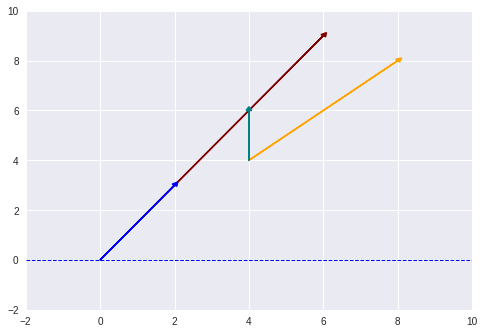

In [22]:
# CREDIT TO RYAN ALLRED/LS

# Plot Linearly Dependent Vectors

# Axis Bounds
plt.xlim(-2,10)          
plt.ylim(-2,10)

# Original Vector
v = [2,3] 

# Scaled Vectors
v2 = np.multiply(3, v)
v3 = np.multiply(-1,v)

# Get Vals for L
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 0*x_vals

# Plot Vectors and L
plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)
plt.arrow(0,0, v2[0], v2[1], linewidth=1.5, head_width=.15, head_length=0.15, color ='maroon')
plt.arrow(0,0, v[0], v[1], linewidth=1.5, head_width=.15, head_length=0.15, color ='blue')

# Plot Linearly Independent Vectors

# Original Vector
v4 = [2,2]

# Vectors
v5 = np.multiply(2, v4)
v6 = [0,2]

# Plot Vectors
plt.arrow(4,4, v5[0], v5[1], linewidth=1.5, head_width=.15, head_length=0.15, color ='orange')
plt.arrow(4,4, v6[0], v6[1], linewidth=1.5, head_width=.15, head_length=0.15, color ='teal');


# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



## 6.2 What does it mean to form a basis?

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

## 7.2 What does the rank of a matrix tell us?

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

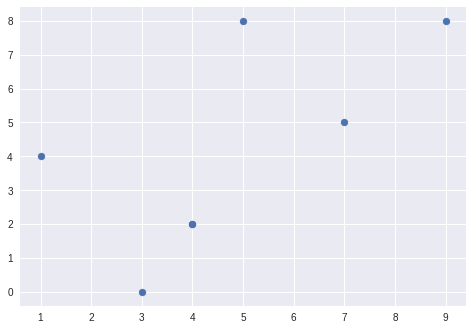

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()